<a href="https://colab.research.google.com/github/Huynh-Truong-75/Project-CNN/blob/main/flower_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**link data train https://drive.google.com/drive/folders/1xvtLRhUJ81Rg9EC2gW0whbSwu9MjExtK?usp=sharing**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot        as plt
from matplotlib.image           import imread
from os                         import listdir
from numpy                      import asarray
from numpy                      import save
from tensorflow.keras.utils import load_img, img_to_array
from keras.models               import Sequential
from keras.layers               import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot        as plt
from tensorflow.keras.utils     import load_img, img_to_array
from tensorflow.keras.optimizers  import SGD
import numpy                    as np

**Tạo Data Train**

In [ ]:
imgs, labels = list(), list()
daisy = '/content/drive/MyDrive/flower_train/daisy/'
#dandelion = '/content/drive/MyDrive/flower_train/dandelion/'
rose = '/content/drive/MyDrive/flower_train/rose/'
sunflower = '/content/drive/MyDrive/flower_train/sunflower/'
tulip = '/content/drive/MyDrive/flower_train/tulip/'

def flower_train(path, output, flower):
  for file in listdir(path):
    if file.startswith(flower):
      img = load_img(path+file,target_size=(150,150))
      img = img_to_array(img)
      imgs.append(img)
      labels.append(output)

flower_train(daisy, 0, str(1))
#flower_train(dandelion, 1, str(2))
flower_train(rose, 1, str(3))
flower_train(sunflower, 2, str(4))
flower_train(tulip, 3, str(5))

In [ ]:
imgs = asarray(imgs)
labels = asarray(labels)
print(imgs.shape,labels.shape)

save('flower_imgs.npy', imgs)
save('flower_labels.npy', labels)

(3036, 150, 150, 3) (3036,)


**Xây Dựng Model**

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(150,150,3), padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

**Diễn Dịch và Train Model**

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(imgs, labels, batch_size=64,epochs=20, verbose=2)
model.save('flower.h5')

Epoch 1/20
48/48 - 12s - loss: 32.3572 - accuracy: 0.3126 - 12s/epoch - 258ms/step
Epoch 2/20
48/48 - 3s - loss: 1.2671 - accuracy: 0.4071 - 3s/epoch - 54ms/step
Epoch 3/20
48/48 - 3s - loss: 1.1227 - accuracy: 0.5026 - 3s/epoch - 57ms/step
Epoch 4/20
48/48 - 3s - loss: 0.8737 - accuracy: 0.6268 - 3s/epoch - 56ms/step
Epoch 5/20
48/48 - 3s - loss: 0.7985 - accuracy: 0.6769 - 3s/epoch - 55ms/step
Epoch 6/20
48/48 - 3s - loss: 0.6309 - accuracy: 0.7467 - 3s/epoch - 56ms/step
Epoch 7/20
48/48 - 3s - loss: 0.5254 - accuracy: 0.7935 - 3s/epoch - 62ms/step
Epoch 8/20
48/48 - 3s - loss: 0.4294 - accuracy: 0.8376 - 3s/epoch - 58ms/step
Epoch 9/20
48/48 - 3s - loss: 0.2758 - accuracy: 0.8959 - 3s/epoch - 55ms/step
Epoch 10/20
48/48 - 3s - loss: 0.1994 - accuracy: 0.9282 - 3s/epoch - 55ms/step
Epoch 11/20
48/48 - 3s - loss: 0.1568 - accuracy: 0.9513 - 3s/epoch - 55ms/step
Epoch 12/20
48/48 - 3s - loss: 0.1326 - accuracy: 0.9605 - 3s/epoch - 55ms/step
Epoch 13/20
48/48 - 3s - loss: 0.1324 - accur

**Dự Đoán Dữ Liệu Mới**

1/1 [==============================] - 0s 17ms/step
[[0.22648513 0.28251398 0.22556584 0.2654351 ]]
1/1 [==============================] - 0s 14ms/step
rose


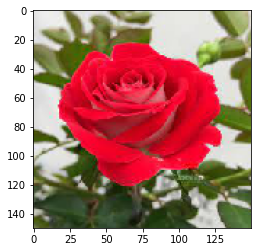

In [ ]:
classes = ["daisy","rose","sunflower","tulip"]
img = load_img('/content/drive/MyDrive/predict/flower/rose.jpg', target_size=(150,150))
plt.imshow(img)

imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)

a = int(np.argmax(model.predict(imgRe), axis=1))
print(classes[a])

1/1 [==============================] - 0s 15ms/step
sunflower


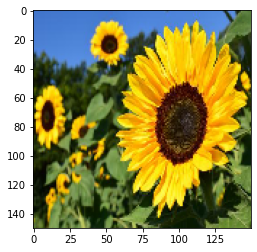

In [ ]:
pic = load_img('/content/drive/MyDrive/predict/flower/sun3.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
a = int(np.argmax(model.predict(pic), axis=1))
print(classes[a])